In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re

In [2]:
trash = pd.read_csv('./trash_hauler_report.csv')

In [3]:
trash.shape

(20226, 11)

In [4]:
trash.head(10)

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/01/17,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1.727970e+06,686779.478089
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
5,25317,11/01/17,Trash Collection Complaint,left trash cart in middle of driveway instead ...,3602 floral dr,37211.0,RED RIVER,4304,16.0,1.751660e+06,643215.201073
6,25325,11/01/17,Damage to Property,Trash/emptied Wednesday & now metal black-mail...,4721 Chalmers Dr,37215.0,RED RIVER,3303,34.0,1.726301e+06,637078.402245
7,25327,11/01/17,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229
8,25330,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed.,4484 Lavergne Couchville Pike,37013.0,RED RIVER,4210,33.0,1.794534e+06,618749.342732
9,25331,11/01/17,Trash - Curbside/Alley Missed Pickup,"Trash missed Tuesday again, ALLEY",1206 Ireland St,37208.0,METRO,9208,19.0,1.733029e+06,668762.640891


In [5]:
trash.info

<bound method DataFrame.info of        Request Number Date Opened                              Request   \
0               25270    11/01/17                      Trash - Backdoor   
1               25274    11/01/17  Trash - Curbside/Alley Missed Pickup   
2               25276    11/01/17  Trash - Curbside/Alley Missed Pickup   
3               25307    11/01/17  Trash - Curbside/Alley Missed Pickup   
4               25312    11/01/17  Trash - Curbside/Alley Missed Pickup   
...               ...         ...                                   ...   
20221          267125    11/01/19  Trash - Curbside/Alley Missed Pickup   
20222          267126    11/01/19  Trash - Curbside/Alley Missed Pickup   
20223          267130    11/01/19  Trash - Curbside/Alley Missed Pickup   
20224          267134    11/01/19  Trash - Curbside/Alley Missed Pickup   
20225          267137    11/01/19  Trash - Curbside/Alley Missed Pickup   

                                             Description  \
0      

In [6]:
trash.describe()

,Request Number,Zip Code,Council District,State Plan X,State Plan Y
count,20226.000000,20151.000000,20177.000000,2.019800e+04,2.019800e+04
mean,149178.986354,37180.621805,18.079100,1.763012e+06,6.595069e+05
std,71837.306889,66.310919,9.917632,7.754951e+05,4.355405e+04
min,25270.000000,37013.000000,1.000000,1.663490e+06,-2.719106e+05
25%,86052.750000,37205.000000,8.000000,1.727831e+06,6.406542e+05
50%,145223.500000,37209.000000,19.000000,1.745845e+06,6.564858e+05
75%,217162.750000,37214.000000,26.000000,1.759491e+06,6.756736e+05
max,267137.000000,37228.000000,35.000000,3.496892e+07,2.204382e+06


In [7]:
trash = trash.rename(columns = {'Request ':'Request'})

In [8]:
potential_miss = r'.[Mm][Ii][Ss]+.'

missed = trash.loc[trash['Description'].str.contains(potential_miss, na=False) | trash['Request'].str.contains(potential_miss, na=False)]

In [9]:
missed = trash.loc[trash['Description'].str.contains(potential_miss, na=False) | trash['Request'].str.contains(potential_miss, na=False)]

In [10]:
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1.710186e+06,664205.101066
7,25327,11/01/17,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1.785225e+06,627146.400187


In [11]:
missed['Council District'] = missed['Council District'].astype('Int64')

C:\Users\joede\AppData\Local\Temp\ipykernel_5368\2357402208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed['Council District'] = missed['Council District'].astype('Int64')


In [12]:
trash['Zip Code'] = trash['Zip Code'].astype('Int64')

In [13]:
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1,1.721259e+06,685444.799565
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20,1.707027e+06,659887.471571
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2,1.735692e+06,685027.245923
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20,1.710186e+06,664205.101066
7,25327,11/01/17,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21,1.731459e+06,666013.601229
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32,1.781137e+06,632448.551144
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6,1.749711e+06,669201.601569
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15,1.770293e+06,674936.303809
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32,1.785225e+06,627146.400187


In [14]:
missed.loc[1346, 'Incident Address'] = '4032 Stewarts Ln'

In [15]:
missed.loc[2794, 'Incident Address'] = '1040 Chicamauga Ave'

In [16]:
missed.loc[missed['Incident Address'].isna()]

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
625,33128,12/13/17,Trash - Curbside/Alley Missed Pickup,Missed.,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
875,35857,12/29/17,Trash - Curbside/Alley Missed Pickup,daughters car parked in front,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
1154,39689,01/17/18,Trash - Curbside/Alley Missed Pickup,Trash pick up not done for Tuesday 1/16/18,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
2839,59517,04/10/18,Trash - Curbside/Alley Missed Pickup,Trash was not pick up last week.,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
3121,62051,04/22/18,Trash - Curbside/Alley Missed Pickup,They forgot to pick up trash from apartment co...,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
11049,157096,03/20/19,Trash - Curbside/Alley Missed Pickup,Trash has not been picked up on the whole street.,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


In [17]:
missed = missed.dropna(subset=['Incident Address'])

In [18]:
missed['Clean Address'] = missed['Incident Address'].str.split(',').str[0]

C:\Users\joede\AppData\Local\Temp\ipykernel_5368\404135838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed['Clean Address'] = missed['Incident Address'].str.split(',').str[0]


In [19]:
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Clean Address
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1,1.721259e+06,685444.799565,4028 Clarksville Pike
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20,1.707027e+06,659887.471571,6528 Thunderbird Dr
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2,1.735692e+06,685027.245923,2603 old matthews rd
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20,1.710186e+06,664205.101066,604 croley dr
7,25327,11/01/17,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21,1.731459e+06,666013.601229,1816 Jo Johnston Ave
...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32,1.781137e+06,632448.551144,2731 Murfreesboro Pike
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6,1.749711e+06,669201.601569,1621 Long Ave
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15,1.770293e+06,674936.303809,2943 Windemere Cir
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32,1.785225e+06,627146.400187,3325 Murfreesboro Pike


In [20]:
missed['Clean Address'] = missed['Clean Address'].str.title()

C:\Users\joede\AppData\Local\Temp\ipykernel_5368\456157262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed['Clean Address'] = missed['Clean Address'].str.title()


In [21]:
missed

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y,Clean Address
1,25274,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1,1.721259e+06,685444.799565,4028 Clarksville Pike
2,25276,11/01/17,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20,1.707027e+06,659887.471571,6528 Thunderbird Dr
3,25307,11/01/17,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2,1.735692e+06,685027.245923,2603 Old Matthews Rd
4,25312,11/01/17,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20,1.710186e+06,664205.101066,604 Croley Dr
7,25327,11/01/17,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21,1.731459e+06,666013.601229,1816 Jo Johnston Ave
...,...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/01/19,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32,1.781137e+06,632448.551144,2731 Murfreesboro Pike
20222,267126,11/01/19,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6,1.749711e+06,669201.601569,1621 Long Ave
20223,267130,11/01/19,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15,1.770293e+06,674936.303809,2943 Windemere Cir
20224,267134,11/01/19,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32,1.785225e+06,627146.400187,3325 Murfreesboro Pike


In [22]:
missed_routes = (
    missed['Trash Route'].value_counts()
    .to_frame(name="Count"))

In [23]:
missed_routes

,Count
Trash Route,
4504,325
3302,269
4404,252
3305,231
9303,231
...,...
2405S,3
3303S,2
2505S,2


In [24]:
missed_fines = (
    missed['Clean Address'].value_counts()
    .to_frame(name="Count")
    .join(
        missed.drop_duplicates('Clean Address')
              .set_index('Clean Address')['Trash Hauler']
    )
)

In [25]:
missed_fines = missed_fines.reset_index()

In [26]:
missed_fines

,Clean Address,Count,Trash Hauler
0,110 George L Davis Blvd,25,METRO
1,12546 Old Hickory Blvd,21,RED RIVER
2,5135 Hickory Hollow Pkwy,20,RED RIVER
3,6007 Obrien Ave,20,RED RIVER
4,3710 N Natchez Ct,19,RED RIVER
...,...,...,...
10912,4242 Eatons Creek Rd,1,RED RIVER
10913,100 Dyer Ct,1,RED RIVER
10914,4601 Grinstead Pl,1,RED RIVER
10915,4335 Setters Rd,1,RED RIVER


In [27]:
missed_fines = missed_fines[missed_fines['Count'] >= 2]

missed_fines

In [28]:
missed_fines

,Clean Address,Count,Trash Hauler
0,110 George L Davis Blvd,25,METRO
1,12546 Old Hickory Blvd,21,RED RIVER
2,5135 Hickory Hollow Pkwy,20,RED RIVER
3,6007 Obrien Ave,20,RED RIVER
4,3710 N Natchez Ct,19,RED RIVER
...,...,...,...
3065,104 Benson Rd,2,RED RIVER
3066,934 Battery Ln,2,RED RIVER
3067,305 Williams Ct,2,RED RIVER
3068,545 Neelys Bend Rd,2,RED RIVER


In [29]:
missed_fines['Fines'] = (missed_fines['Count']-1) * 200

C:\Users\joede\AppData\Local\Temp\ipykernel_5368\3233342310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_fines['Fines'] = (missed_fines['Count']-1) * 200


In [30]:
missed_fines

,Clean Address,Count,Trash Hauler,Fines
0,110 George L Davis Blvd,25,METRO,4800
1,12546 Old Hickory Blvd,21,RED RIVER,4000
2,5135 Hickory Hollow Pkwy,20,RED RIVER,3800
3,6007 Obrien Ave,20,RED RIVER,3800
4,3710 N Natchez Ct,19,RED RIVER,3600
...,...,...,...,...
3065,104 Benson Rd,2,RED RIVER,200
3066,934 Battery Ln,2,RED RIVER,200
3067,305 Williams Ct,2,RED RIVER,200
3068,545 Neelys Bend Rd,2,RED RIVER,200


In [31]:
total_fines = missed_fines['Fines'].sum()

In [32]:
total_fines

np.int64(1175200)

In [33]:
trash['Trash Hauler'].unique()

array(['RED RIVER', 'WASTE IND', 'METRO', nan, 'Metro'], dtype=object)

In [34]:
missed_fines['Trash Hauler'] = trash['Trash Hauler'].astype(str)

C:\Users\joede\AppData\Local\Temp\ipykernel_5368\1793511106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_fines['Trash Hauler'] = trash['Trash Hauler'].astype(str)


In [35]:
missed_fines['Trash Hauler'].unique()

array(['RED RIVER', 'WASTE IND', 'METRO', 'nan', 'Metro'], dtype=object)

In [36]:
missed_fines['Trash Hauler'] = trash['Trash Hauler'].str.lower()

C:\Users\joede\AppData\Local\Temp\ipykernel_5368\115679687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_fines['Trash Hauler'] = trash['Trash Hauler'].str.lower()


In [37]:
missed_fines['Trash Hauler'].unique()

array(['red river', 'waste ind', 'metro', nan], dtype=object)

In [38]:
missed_fines['Trash Hauler'] = trash['Trash Hauler'].str.title()

C:\Users\joede\AppData\Local\Temp\ipykernel_5368\3280248706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_fines['Trash Hauler'] = trash['Trash Hauler'].str.title()


In [39]:
missed_fines['Trash Hauler'] = (
    missed_fines['Trash Hauler']
    .fillna("Unknown")   # replace NaN with text
    .str.title()                  # normalize capitalization
)

C:\Users\joede\AppData\Local\Temp\ipykernel_5368\3135226164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missed_fines['Trash Hauler'] = (


In [40]:
missed_fines['Trash Hauler'].unique()

array(['Red River', 'Waste Ind', 'Metro', 'Unknown'], dtype=object)

In [41]:
hauler_fines = missed_fines.groupby('Trash Hauler').sum('Fines')

In [79]:
hauler_fines = hauler_fines.reset_index()

In [80]:
hauler_fines=pd.DataFrame(hauler_fines)

In [81]:
hauler_fines

,Trash Hauler,Count,Fines
0,Metro,1907,245200
1,Red River,6194,825800
2,Unknown,231,30200
3,Waste Ind,614,74000


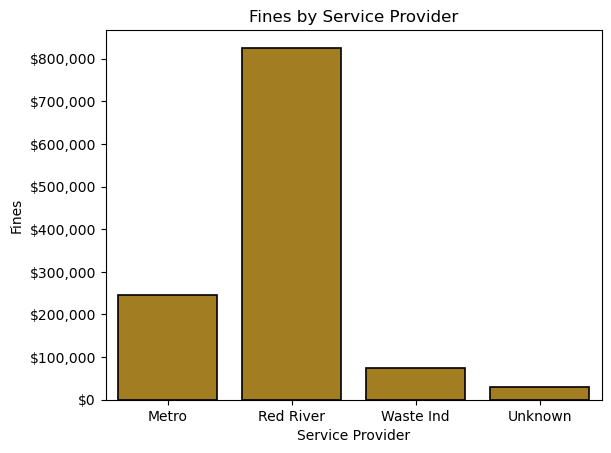

In [83]:
order = [hauler for hauler in hauler_fines['Trash Hauler'].unique() if hauler != "Unknown"] + ["Unknown"]
sns.barplot(x='Trash Hauler', y='Fines', data=hauler_fines,
            order=order,
           color ='darkgoldenrod',
           edgecolor='black',
           linewidth=1.2)
plt.title("Fines by Service Provider")
plt.xlabel("Service Provider")
plt.ylabel("Fines")
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.savefig('Fines_bar.png', dpi=300, bbox_inches='tight')
plt.show()

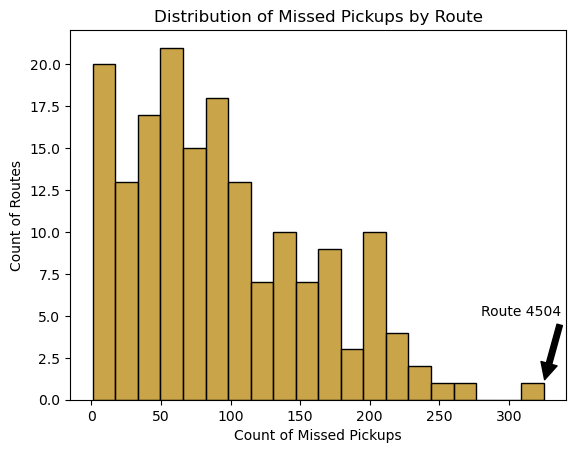

In [85]:
sns.histplot(missed_routes["Count"], 
                             bins=20,
                            color='darkgoldenrod',
                            edgecolor='black')
plt.title('Distribution of Missed Pickups by Route')
plt.xlabel('Count of Missed Pickups')
plt.ylabel('Count of Routes')
plt.grid(False)
plt.annotate(
    'Route 4504',
    xy=(325, 1),
    xytext=(280, 5),
    arrowprops=dict(facecolor='black', shrink=0.05)
)
plt.savefig('missed_pickups_hist.png', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
rrfee = 0
wifee = 0
mfee = 0
nanfee = 0
for hauler in missed_fines['Trash Hauler']:
    if hauler == 'Red River':
        rrfee = rrfee + missed_fines['Fines']
    elif hauler == 'Waste Ind':
        wifee = wifee + missed_fines['Fines']
    elif hauler == 'Metro':
        mfee = mfee + missed_fines['Fines']
    else: nanfee = nanfee + missed_fines['Fines']
print(rrfee)
print(wifee)
print(mfee)
print(nanfee)

0       9912000
1       8260000
2       7847000
3       7847000
4       7434000
         ...   
3065     413000
3066     413000
3067     413000
3068     413000
3069     413000
Name: Fines, Length: 3070, dtype: int64
0       1171200
1        976000
2        927200
3        927200
4        878400
         ...   
3065      48800
3066      48800
3067      48800
3068      48800
3069      48800
Name: Fines, Length: 3070, dtype: int64
0       3268800
1       2724000
2       2587800
3       2587800
4       2451600
         ...   
3065     136200
3066     136200
3067     136200
3068     136200
3069     136200
Name: Fines, Length: 3070, dtype: int64
0       384000
1       320000
2       304000
3       304000
4       288000
         ...  
3065     16000
3066     16000
3067     16000
3068     16000
3069     16000
Name: Fines, Length: 3070, dtype: int64
